<a href="https://colab.research.google.com/github/rambakale/Capstone-Project-Playstore-Analysis/blob/main/Playstore_Analysis_TeamProject_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##The Google Play Store is an app which is a platform that provides access to the collection of apps, movies, Books etc verified by Google which are available on servers at google for Android Devices. For this EDA we will only be looking at apps.

##These apps are further divided into different categories based on characteristics of those apps.

##Google keeps track record for each user about the apps Installed, Ratings given by users, Reviews given by users, apps marked as inappropriate by users. Google further uses this data to analyze user behaviour based on feedback given to improve user experience and user engagement. 

For this Exploratory Data Analysis, we have been provided with 2 files, namely

*   Play store data.csv
*   User Reviews.csv

---
# **Importing the required libraries**
---

In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline



---


# **Mounting the Drive**

---



To first import the data, we first need to mount the drive from where we will be importing the data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive




---


# **Importing the data from Drive**

---



We have been given two data sets namely User Reviews and  Play Store data. Lets import these files and check the information present in those files


In [ ]:

dfplay=pd.read_csv("/content/drive/MyDrive/Play Store Data.csv")

dfplay.head(10)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [ ]:
dfplay.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


Play store data.csv contains all the details about the applications present in Google Play. There are 13 unique columns that describe a given app.

In [ ]:
dfuser=pd.read_csv('/content/drive/MyDrive/User Reviews.csv')

dfuser.head(10)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000
6,10 Best Foods for You,Amazing,Positive,0.60,0.900000
7,10 Best Foods for You,NaN,NaN,NaN,NaN
8,10 Best Foods for You,"Looking forward app,",Neutral,0.00,0.000000
9,10 Best Foods for You,It helpful site ! It help foods get !,Neutral,0.00,0.000000




User Reviews.csv file contains separate details given by the users for apps. There are 5 columns that describe feedback given by each user.: 



---


# **Data Wrangling**

---



Data wrangling is the process of transforming raw data into some desired data format for better analysis and decision making.

We will be removing duplicates, check for outliers, replacing null values with appropriate values, converting data types to float wherever its necessary

checking for duplicate rows

In [ ]:
duplicate_rows =dfplay[dfplay.duplicated()].count()
print('Duplicated rows are \n' , duplicate_rows)


Duplicated rows are 
 App               483
Category          483
Rating            474
Reviews           483
Size              483
Installs          483
Type              483
Price             483
Content Rating    483
Genres            483
Last Updated      483
Current Ver       483
Android Ver       483
dtype: int64


In [ ]:
# Lets drop the duplicate rows
dfplay= dfplay[~dfplay.duplicated()] 

In [ ]:
# read the data of play store data after the removing duplicate data
dfplay.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10358 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10358 non-null  object 
 1   Category        10358 non-null  object 
 2   Rating          8893 non-null   float64
 3   Reviews         10358 non-null  object 
 4   Size            10358 non-null  object 
 5   Installs        10358 non-null  object 
 6   Type            10357 non-null  object 
 7   Price           10358 non-null  object 
 8   Content Rating  10357 non-null  object 
 9   Genres          10358 non-null  object 
 10  Last Updated    10358 non-null  object 
 11  Current Ver     10350 non-null  object 
 12  Android Ver     10355 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


##As we can see, previously we had 10,841 rows including duplicate rows.
##After deleting duplicate rows, we are left with 10,358 rows with apps.

##Lets check, if there is any multiple rows with same app name

In [ ]:
dfplay['App'].value_counts()

ROBLOX                                           9
8 Ball Pool                                      7
Bubble Shooter                                   6
Helix Jump                                       6
Zombie Catchers                                  6
                                                ..
Theme Android P Black design for LG V30          1
Popsicle Launcher for Android P 9.0 launcher     1
PixelLab - Text on pictures                      1
P Launcher for Android™ 9.0                      1
iHoroscope - 2018 Daily Horoscope & Astrology    1
Name: App, Length: 9660, dtype: int64

##As seen from above, some apps have multiple rows. But since we have already deleted duplicated rows, these apps with multiple rows may have a certain different column value, thats why the whole row isn't considered a duplicate.

##Lets see which column or columns are displaying different value for same app name

In [ ]:
dfplay[dfplay['App']=='ROBLOX']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1653,ROBLOX,GAME,4.5,4447388,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1701,ROBLOX,GAME,4.5,4447346,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1748,ROBLOX,GAME,4.5,4448791,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1841,ROBLOX,GAME,4.5,4449882,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1870,ROBLOX,GAME,4.5,4449910,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2016,ROBLOX,FAMILY,4.5,4449910,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2088,ROBLOX,FAMILY,4.5,4450855,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2206,ROBLOX,FAMILY,4.5,4450890,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
4527,ROBLOX,FAMILY,4.5,4443407,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up


##As we expected, as seen from the above dataframe, ROBLOX app is having identical rows with different number of reviews and category. Lets drop multiple rows with same app name with same category.




In [ ]:
dfplay.drop_duplicates(subset=['App','Category'], inplace=True)

In [ ]:
print('Total unique apps in each category is : ', dfplay['App'].count())
dfplay[dfplay['App']=='ROBLOX']


Total unique apps in each category is :  9745


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1653,ROBLOX,GAME,4.5,4447388,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2016,ROBLOX,FAMILY,4.5,4449910,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up


# **Lets look if there's any outlier**
Now, since apps with multiple rows is filtered, lets look if there's any outlier, i.e.some app that doesnt follow the trend most apps do


In [ ]:
# lets check the Rating column if theres null value
dfplay.info()
dfplay['Rating'].describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9745 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9745 non-null   object 
 1   Category        9745 non-null   object 
 2   Rating          8281 non-null   float64
 3   Reviews         9745 non-null   object 
 4   Size            9745 non-null   object 
 5   Installs        9745 non-null   object 
 6   Type            9744 non-null   object 
 7   Price           9745 non-null   object 
 8   Content Rating  9744 non-null   object 
 9   Genres          9745 non-null   object 
 10  Last Updated    9745 non-null   object 
 11  Current Ver     9737 non-null   object 
 12  Android Ver     9742 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1.0+ MB


count    8281.000000
mean        4.176875
std         0.558980
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max        19.000000
Name: Rating, dtype: float64

Clearly, theres atleast an outlier with rating as 19, because maximum rating an app can have on play store is 5

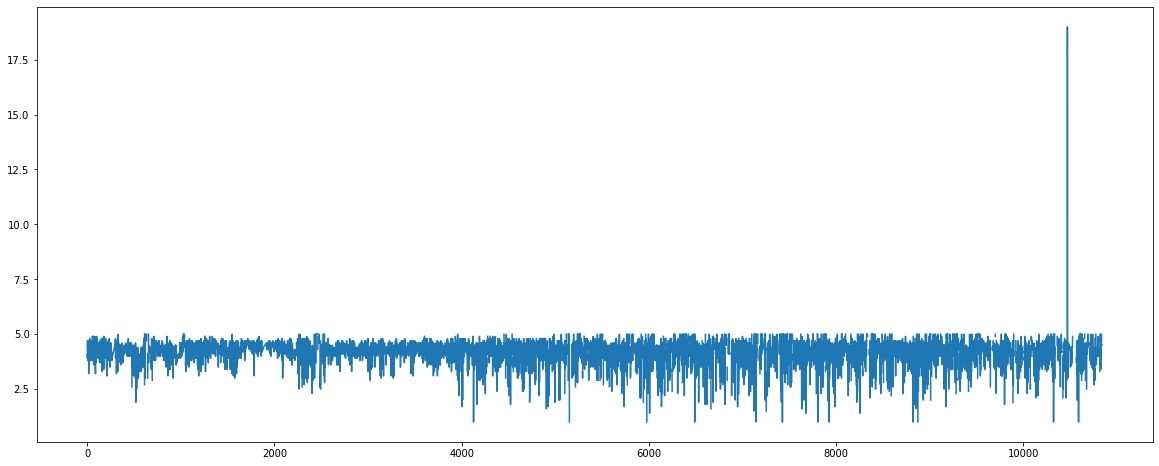

In [ ]:
# lets plot graph for ratings
plt.figure(figsize=(20, 8))

dfplay['Rating'].plot()


As we can notice that rating is going as high as 19
Whereas the maximum rating is 5.

So there is an outlier.

Lets see the rows, with ratings more than 5

In [ ]:
dfplay[dfplay['Rating']>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


Lets delete this row, since it can skew the results as its an outlier

In [ ]:
# dfplay.drop([10472],inplace=True)
dfplay.describe()

,Rating,Reviews,Size,Installs,Price,Size in MBs
count,9659.000000,9.659000e+03,8431.000000,9.659000e+03,9659.000000,1228.0
mean,4.192598,2.167523e+05,20.396819,7.793087e+06,1.098575,0.0
std,0.496104,1.831360e+06,21.828626,5.376806e+07,16.852049,0.0
min,1.000000,0.000000e+00,0.008500,0.000000e+00,0.000000,0.0
25%,4.000000,2.500000e+01,4.550000,1.000000e+03,0.000000,0.0
50%,4.300000,9.690000e+02,12.000000,1.000000e+05,0.000000,0.0
75%,4.500000,2.945350e+04,28.000000,1.000000e+06,0.000000,0.0
max,5.000000,7.815831e+07,100.000000,1.000000e+09,400.000000,0.0


Since we have dropped an outlier, lets check the boxplot for rating

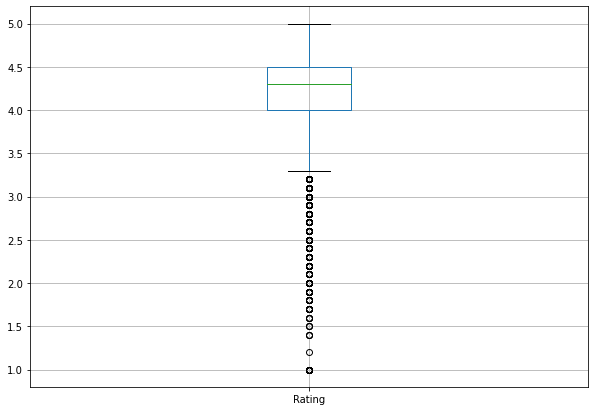

In [ ]:
plt.figure(figsize =(10, 7))
dfplay.boxplot()


As we can see from the box plot, median for rating is between 4-4.5 with interquartile range as 4.0 to 4.5. 

Maximum rating is 5.

Minimum rating is 1. 

(array([ 16.,   1.,   0.,   3.,   3.,   4.,   8.,   8.,  11.,  12.,   8.,
         14.,  20.,  19.,  20.,  24.,  23.,  40.,  45.,  81.,  69.,  63.,
        100., 126., 156., 167., 226., 287., 361., 517., 629., 816., 912.,
        909., 862., 694., 448., 221., 357.]),
 array([1.        , 1.1025641 , 1.20512821, 1.30769231, 1.41025641,
        1.51282051, 1.61538462, 1.71794872, 1.82051282, 1.92307692,
        2.02564103, 2.12820513, 2.23076923, 2.33333333, 2.43589744,
        2.53846154, 2.64102564, 2.74358974, 2.84615385, 2.94871795,
        3.05128205, 3.15384615, 3.25641026, 3.35897436, 3.46153846,
        3.56410256, 3.66666667, 3.76923077, 3.87179487, 3.97435897,
        4.07692308, 4.17948718, 4.28205128, 4.38461538, 4.48717949,
        4.58974359, 4.69230769, 4.79487179, 4.8974359 , 5.        ]),
 <a list of 39 Patch objects>)

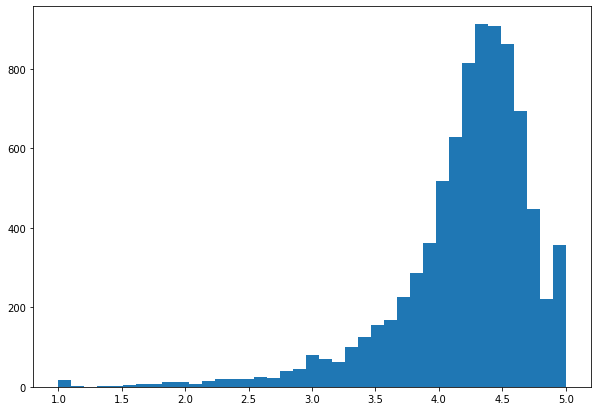

In [ ]:
fig = plt.figure(figsize =(10, 7))
plt.hist(dfplay['Rating'],bins=39)


In [ ]:
dfplay.isna().sum()

App                  0
Category             0
Rating            1464
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

since there are certain null values in ratings column, lets replace them with median value

In [ ]:
def replace_with_median(series):
  return series.fillna(series.median())

In [ ]:
dfplay['Rating'] = dfplay['Rating'].transform(replace_with_median)

Lets see the number of null values in each column

In [ ]:
dfplay.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

We need to replace null value in Type, Current Ver, Android Ver with certain logically correct value.
Therefore, we will be replacing null values of those columns with mode values of respective columns

In [ ]:
# Replace the missing categorical values with mode
dfplay['Type'].fillna(str(dfplay['Type'].mode()),inplace=True)
dfplay['Current Ver'].fillna(str(dfplay['Current Ver'].mode()),inplace=True)
dfplay['Android Ver'].fillna(str(dfplay['Android Ver'].mode()),inplace=True)

In [ ]:
dfplay.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

# **Lets describe whole dataset so as to get good idea on it. But before that we need to convert all the columns to numeric values i.e float**

In [ ]:
# convert price into float values by removing '$' sign
dfplay['Price'] = dfplay['Price'].apply(lambda x: str(x).replace('$','') if '$' in str(x) else str(x))
dfplay['Price'] = dfplay['Price'].apply(lambda x: float(x))

In [ ]:
# convert installs into float value by removing '+',',' sign
dfplay['Installs'] = dfplay['Installs'].apply(lambda x: str(x).replace('+','') if '+' in str(x) else str(x))
dfplay['Installs'] = dfplay['Installs'].apply(lambda x: str(x).replace(',','') if ',' in str(x) else str(x))
dfplay['Installs'] = dfplay['Installs'].apply(lambda x: float(x))

In [ ]:
dfplay.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,5000.0,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100.0,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,4.3,3,9.5M,1000.0,Free,0.0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,1000.0,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,10000000.0,Free,0.0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [ ]:
dfplay.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9744 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9744 non-null   object 
 1   Category        9744 non-null   object 
 2   Rating          9744 non-null   float64
 3   Reviews         9744 non-null   object 
 4   Size            9744 non-null   object 
 5   Installs        9744 non-null   float64
 6   Type            9744 non-null   object 
 7   Price           9744 non-null   float64
 8   Content Rating  9744 non-null   object 
 9   Genres          9744 non-null   object 
 10  Last Updated    9744 non-null   object 
 11  Current Ver     9744 non-null   object 
 12  Android Ver     9744 non-null   object 
dtypes: float64(3), object(10)
memory usage: 1.0+ MB


In [ ]:
#  For size, it is given either in K i.e Kilo Byte, M i.e Mega Byte or varies with device

#  We will be replaceing Varies with device value to Nan value, since neither mean or mode value would be appropriate at that place
dfplay['Size'] = dfplay['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)
dfplay['Size'] = dfplay['Size'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)
#  Converting size to numeric value.Converting KB to MB 
dfplay['Size'] = dfplay['Size'].apply(lambda x: float(str(x).replace('k', '')) / 1000 if 'k' in str(x) else x)
dfplay['Size'] = dfplay['Size'].apply(lambda x: str(x).replace(',', '') if 'M' in str(x) else x)
# Convert str to float
dfplay['Size'] = dfplay['Size'].apply(lambda x: float(x))

In [ ]:
dfplay.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9744 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9744 non-null   object 
 1   Category        9744 non-null   object 
 2   Rating          9744 non-null   float64
 3   Reviews         9744 non-null   object 
 4   Size            8494 non-null   float64
 5   Installs        9744 non-null   float64
 6   Type            9744 non-null   object 
 7   Price           9744 non-null   float64
 8   Content Rating  9744 non-null   object 
 9   Genres          9744 non-null   object 
 10  Last Updated    9744 non-null   object 
 11  Current Ver     9744 non-null   object 
 12  Android Ver     9744 non-null   object 
dtypes: float64(4), object(9)
memory usage: 1.0+ MB


In [ ]:
# Converting Reviews to numeric values

dfplay['Reviews']

0           159
1           967
2         87510
3        215644
4           967
          ...  
10836        38
10837         4
10838         3
10839       114
10840    398307
Name: Reviews, Length: 9744, dtype: object

In [ ]:
dfplay['Reviews']=dfplay['Reviews'].apply(lambda x: float(x))

In [ ]:
# dfplay['Reviews'] = pd.to_numeric(dfplay['Reviews'], errors= 'ignore')

In [ ]:
dfplay = dfplay.loc[dfplay.groupby(['App'])['Reviews'].idxmax()]

In [ ]:
dfplay.describe()

,Rating,Reviews,Size,Installs,Price
count,9659.000000,9.659000e+03,8431.000000,9.659000e+03,9659.000000
mean,4.192598,2.167523e+05,20.396819,7.793087e+06,1.098575
std,0.496104,1.831360e+06,21.828626,5.376806e+07,16.852049
min,1.000000,0.000000e+00,0.008500,0.000000e+00,0.000000
25%,4.000000,2.500000e+01,4.550000,1.000000e+03,0.000000
50%,4.300000,9.690000e+02,12.000000,1.000000e+05,0.000000
75%,4.500000,2.945350e+04,28.000000,1.000000e+06,0.000000
max,5.000000,7.815831e+07,100.000000,1.000000e+09,400.000000


In [ ]:
# Verifying if all the null values are replaced
print(dfplay.isna().sum())

App                  0
Category             0
Rating               0
Reviews              0
Size              1228
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          0
Android Ver          0
dtype: int64


Null values in size columns are nothing but apps with sizes which varies with the phone

In [ ]:
dfplay.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
8884,"""i DT"" Fútbol. Todos Somos Técnicos.",SPORTS,4.3,27.0,3.600,500.0,Free,0.00,Everyone,Sports,"October 7, 2017",0.22,4.1 and up
8532,+Download 4 Instagram Twitter,SOCIAL,4.5,40467.0,22.000,1000000.0,Free,0.00,Everyone,Social,"August 2, 2018",5.03,4.1 and up
324,- Free Comics - Comic Apps,COMICS,3.5,115.0,9.100,10000.0,Free,0.00,Mature 17+,Comics,"July 13, 2018",5.0.12,5.0 and up
4541,.R,TOOLS,4.5,259.0,0.203,10000.0,Free,0.00,Everyone,Tools,"September 16, 2014",1.1.06,1.5 and up
4636,/u/app,COMMUNICATION,4.7,573.0,53.000,10000.0,Free,0.00,Mature 17+,Communication,"July 3, 2018",4.2.4,4.1 and up
5940,058.ba,NEWS_AND_MAGAZINES,4.4,27.0,14.000,100.0,Free,0.00,Everyone,News & Magazines,"July 6, 2018",1.0,4.2 and up
10252,1. FC Köln App,SPORTS,4.6,2019.0,41.000,100000.0,Free,0.00,Everyone,Sports,"July 20, 2018",1.13.0,4.4 and up
1393,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490.0,3.800,500000.0,Free,0.00,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up
8483,10 Minutes a Day Times Tables,FAMILY,4.1,681.0,48.000,100000.0,Free,0.00,Everyone,Education,"July 3, 2014",1.2,2.2 and up
7738,10 WPM Amateur ham radio CW Morse code trainer,COMMUNICATION,3.5,10.0,3.800,100.0,Paid,1.49,Everyone,Communication,"May 12, 2018",2.1.4,2.1 and up


In [ ]:
dfplay.tail(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10109,哈哈姆特不EY,COMMUNICATION,4.3,239.0,18.0,10000.0,Free,0.00,Everyone,Communication,"July 31, 2018",1.3.4,4.4 and up
5698,日本AV历史,BOOKS_AND_REFERENCE,4.1,215.0,30.0,10000.0,Free,0.00,Teen,Books & Reference,"March 6, 2018",1.2,4.0 and up
313,"漫咖 Comics - Manga,Novel and Stories",COMICS,4.1,12088.0,21.0,1000000.0,Free,0.00,Mature 17+,Comics,"July 6, 2018",2.3.1,4.0.3 and up
9222,英漢字典 EC Dictionary,FAMILY,4.3,55408.0,NaN,1000000.0,Free,0.00,Everyone,Education,"January 8, 2018",Varies with device,Varies with device
6420,감성학원 BL 첫사랑,COMICS,4.4,190.0,34.0,10000.0,Free,0.00,Everyone,Comics,"November 17, 2017",3.2.1,3.0 and up
6334,"뽕티비 - 개인방송, 인터넷방송, BJ방송",VIDEO_PLAYERS,4.3,414.0,59.0,100000.0,Free,0.00,Mature 17+,Video Players & Editors,"July 18, 2018",4.0.7,4.0.3 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718.0,26.0,10000.0,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
2575,"💘 WhatsLov: Smileys of love, stickers and GIF",SOCIAL,4.6,22098.0,18.0,1000000.0,Free,0.00,Everyone,Social,"July 24, 2018",4.2.4,4.0.3 and up
7559,📏 Smart Ruler ↔️ cm/inch measuring for homework!,TOOLS,4.0,19.0,3.2,10000.0,Free,0.00,Everyone,Tools,"October 21, 2017",1.0,4.2 and up
882,🔥 Football Wallpapers 4K | Full HD Backgrounds 😍,ENTERTAINMENT,4.7,11661.0,4.0,1000000.0,Free,0.00,Everyone,Entertainment,"July 14, 2018",1.1.3.2,4.0.3 and up


In [ ]:
dfplay.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 8884 to 882
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9659 non-null   object 
 1   Category        9659 non-null   object 
 2   Rating          9659 non-null   float64
 3   Reviews         9659 non-null   float64
 4   Size            8431 non-null   float64
 5   Installs        9659 non-null   float64
 6   Type            9659 non-null   object 
 7   Price           9659 non-null   float64
 8   Content Rating  9659 non-null   object 
 9   Genres          9659 non-null   object 
 10  Last Updated    9659 non-null   object 
 11  Current Ver     9659 non-null   object 
 12  Android Ver     9659 non-null   object 
dtypes: float64(5), object(8)
memory usage: 1.0+ MB


In [ ]:
dfplay.describe()

,Rating,Reviews,Size,Installs,Price
count,9659.000000,9.659000e+03,8431.000000,9.659000e+03,9659.000000
mean,4.192598,2.167523e+05,20.396819,7.793087e+06,1.098575
std,0.496104,1.831360e+06,21.828626,5.376806e+07,16.852049
min,1.000000,0.000000e+00,0.008500,0.000000e+00,0.000000
25%,4.000000,2.500000e+01,4.550000,1.000000e+03,0.000000
50%,4.300000,9.690000e+02,12.000000,1.000000e+05,0.000000
75%,4.500000,2.945350e+04,28.000000,1.000000e+06,0.000000
max,5.000000,7.815831e+07,100.000000,1.000000e+09,400.000000


---
# **Lets graphically visualize the data**

---




In [ ]:
group = dfplay.groupby('Category')
a = group['Rating'].agg(np.mean)
b = group['Price'].agg(np.mean)
c = group['Reviews'].agg(np.mean)
d = group['Installs'].agg(np.sum)

## Average Rating according to Category

In [ ]:
a

Category
ART_AND_DESIGN         4.357377
AUTO_AND_VEHICLES      4.205882
BEAUTY                 4.283019
BOOKS_AND_REFERENCE    4.334234
BUSINESS               4.173810
COMICS                 4.185714
COMMUNICATION          4.154921
DATING                 4.050000
EDUCATION              4.354206
ENTERTAINMENT          4.129885
EVENTS                 4.395313
FAMILY                 4.197170
FINANCE                4.138551
FOOD_AND_DRINK         4.192857
GAME                   4.248363
HEALTH_AND_FITNESS     4.251736
HOUSE_AND_HOME         4.167123
LIBRARIES_AND_DEMO     4.207143
LIFESTYLE              4.131436
MAPS_AND_NAVIGATION    4.062595
MEDICAL                4.202025
NEWS_AND_MAGAZINES     4.156693
PARENTING              4.300000
PERSONALIZATION        4.325532
PHOTOGRAPHY            4.166548
PRODUCTIVITY           4.206150
SHOPPING               4.237624
SOCIAL                 4.255230
SPORTS                 4.232923
TOOLS                  4.074668
TRAVEL_AND_LOCAL       4.103196

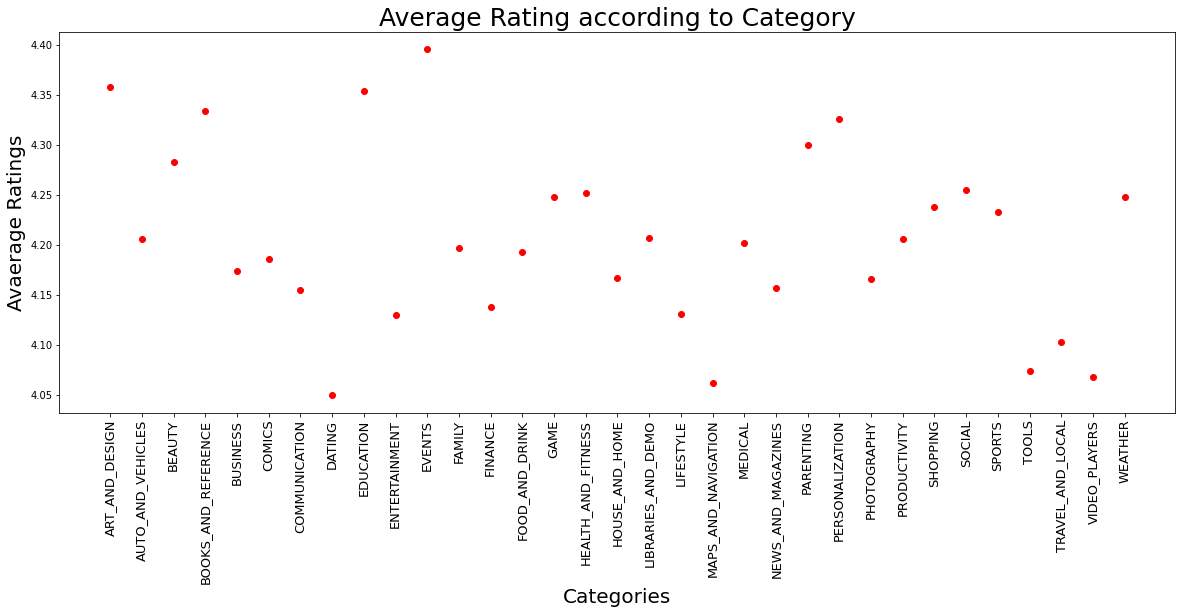

In [ ]:
plt.figure(figsize=(20,7))
plt.xlabel('Categories',fontsize = 20)
plt.ylabel('Avaerage Ratings',fontsize = 20)
plt.title('Average Rating according to Category',fontsize = 25)
plt.plot(a,'ro')
plt.xticks(rotation =90 , fontsize = 13)
plt.show()

##The Events, Art and Design, Education Categories has the highest Ratings with **Events** category having highest rating. Whereas, Dating, Maps and navigation, Video players category has got lowest ratings i.e. below 4.

# **Category wise Pricing**

In [ ]:
b

Category
ART_AND_DESIGN            5.97
AUTO_AND_VEHICLES        13.47
BEAUTY                    0.00
BOOKS_AND_REFERENCE     119.77
BUSINESS                175.29
COMICS                    0.00
COMMUNICATION            83.14
DATING                   20.45
EDUCATION                13.97
ENTERTAINMENT             7.98
EVENTS                  109.99
FAMILY                 2403.85
FINANCE                2900.83
FOOD_AND_DRINK            8.48
GAME                    284.31
HEALTH_AND_FITNESS       64.35
HOUSE_AND_HOME            0.00
LIBRARIES_AND_DEMO        0.99
LIFESTYLE              2360.87
MAPS_AND_NAVIGATION      26.95
MEDICAL                 995.70
NEWS_AND_MAGAZINES        3.98
PARENTING                 9.58
PERSONALIZATION         150.48
PHOTOGRAPHY             118.28
PRODUCTIVITY            250.93
SHOPPING                  5.48
SOCIAL                   15.97
SPORTS                  100.00
TOOLS                   267.25
TRAVEL_AND_LOCAL         49.95
VIDEO_PLAYERS            10.46

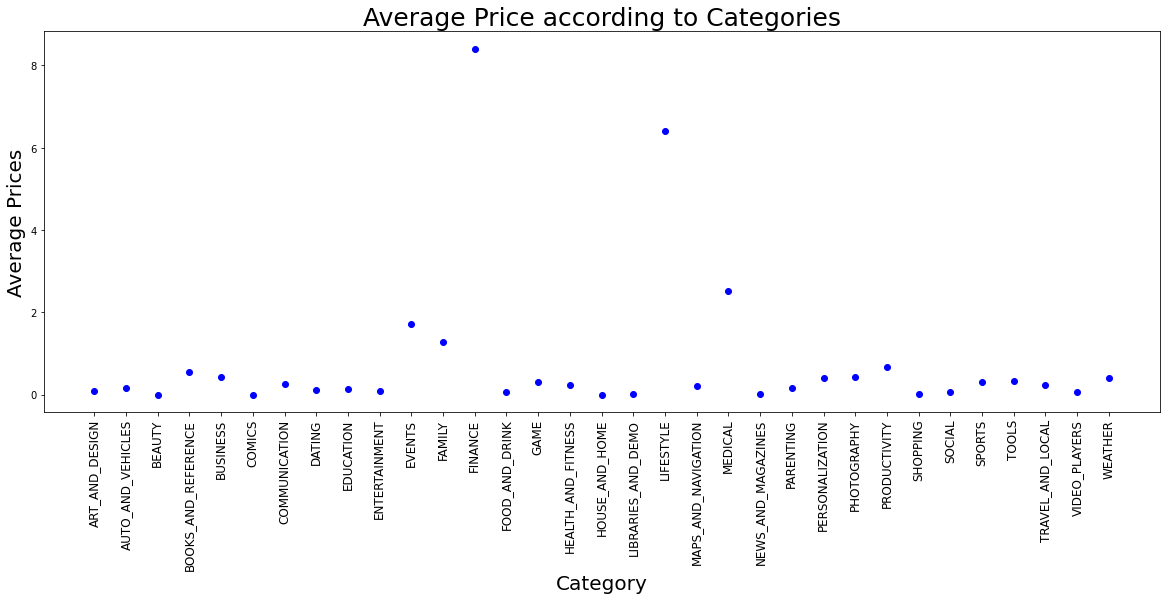

In [ ]:
plt.figure(figsize=(20,7))
plt.plot(b,'bo')
plt.xticks(rotation=90 , fontsize = 12)
plt.title('Average Price according to Categories', fontsize = 25)
plt.xlabel('Category',fontsize = 20)
plt.ylabel('Average Prices',fontsize = 20)
plt.show()

##Clearly, Finance has highest average price follwed by Lifestyle and then Medical Category for apps 

# **Average Reviews according to Category**

In [ ]:
c

Category
ART_AND_DESIGN          23115.245902
AUTO_AND_VEHICLES       13690.188235
BEAUTY                   7476.226415
BOOKS_AND_REFERENCE     75321.234234
BUSINESS                23548.202381
COMICS                  41822.696429
COMMUNICATION          907337.676190
DATING                  21314.629412
EDUCATION               54745.401869
ENTERTAINMENT          294923.436782
EVENTS                   2515.906250
FAMILY                 103265.286172
FINANCE                 36701.756522
FOOD_AND_DRINK          56473.464286
GAME                   623699.530095
HEALTH_AND_FITNESS      74171.371528
HOUSE_AND_HOME          26434.534247
LIBRARIES_AND_DEMO      10795.607143
LIFESTYLE               32066.859079
MAPS_AND_NAVIGATION    135337.007634
MEDICAL                  2994.863291
NEWS_AND_MAGAZINES      91063.889764
PARENTING               15972.183333
PERSONALIZATION        142401.808511
PHOTOGRAPHY            374915.551601
PRODUCTIVITY           148638.098930
SHOPPING               220553

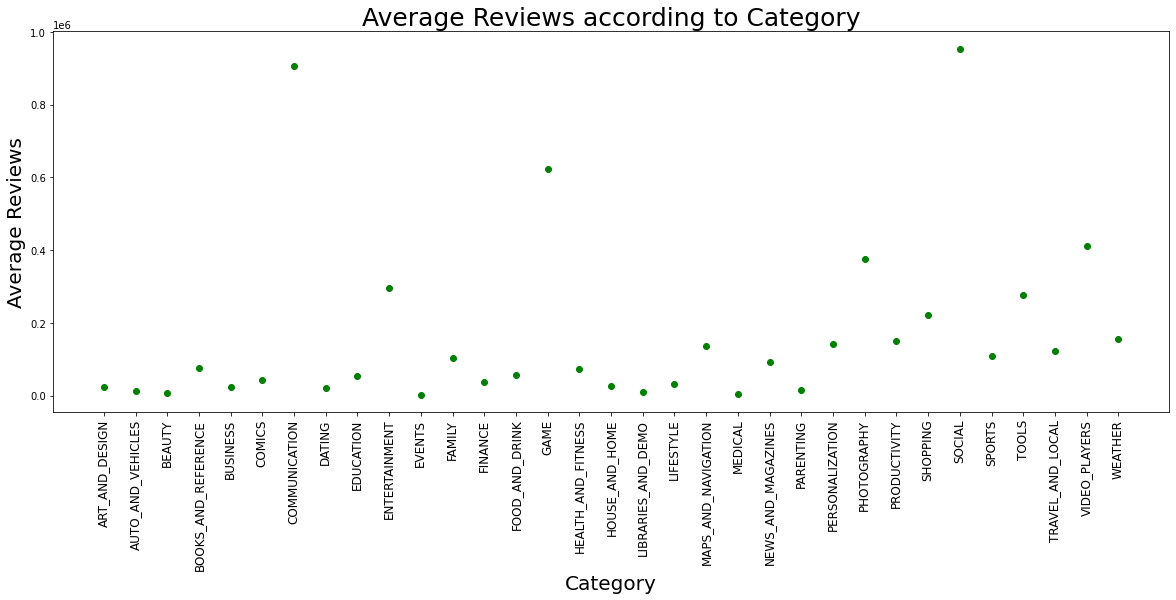

In [ ]:
plt.figure(figsize=(20,7))
plt.plot(c,'go')
plt.xticks(rotation=90 , fontsize = 12)
plt.title('Average Reviews according to Category',fontsize = 25)
plt.xlabel('Category',fontsize = 20)
plt.ylabel('Average Reviews',fontsize = 20)
plt.show()

## As seen from the graph, social has received the highest number of average reviews follwed by communication which is much more than any other categories.

# **Number of installs for each Category**



In [ ]:
d

Category
ART_AND_DESIGN         1.132381e+08
AUTO_AND_VEHICLES      5.313021e+07
BEAUTY                 2.719705e+07
BOOKS_AND_REFERENCE    1.665970e+09
BUSINESS               6.971649e+08
COMICS                 4.498115e+07
COMMUNICATION          1.103828e+10
DATING                 1.409251e+08
EDUCATION              1.899520e+08
ENTERTAINMENT          9.896600e+08
EVENTS                 1.597316e+07
FAMILY                 6.211542e+09
FINANCE                4.553487e+08
FOOD_AND_DRINK         2.117988e+08
GAME                   1.342792e+10
HEALTH_AND_FITNESS     1.144023e+09
HOUSE_AND_HOME         9.720246e+07
LIBRARIES_AND_DEMO     5.299591e+07
LIFESTYLE              5.038235e+08
MAPS_AND_NAVIGATION    5.032819e+08
MEDICAL                3.819318e+07
NEWS_AND_MAGAZINES     2.369218e+09
PARENTING              3.152111e+07
PERSONALIZATION        1.532495e+09
PHOTOGRAPHY            4.649148e+09
PRODUCTIVITY           5.793091e+09
SHOPPING               1.400349e+09
SOCIAL             

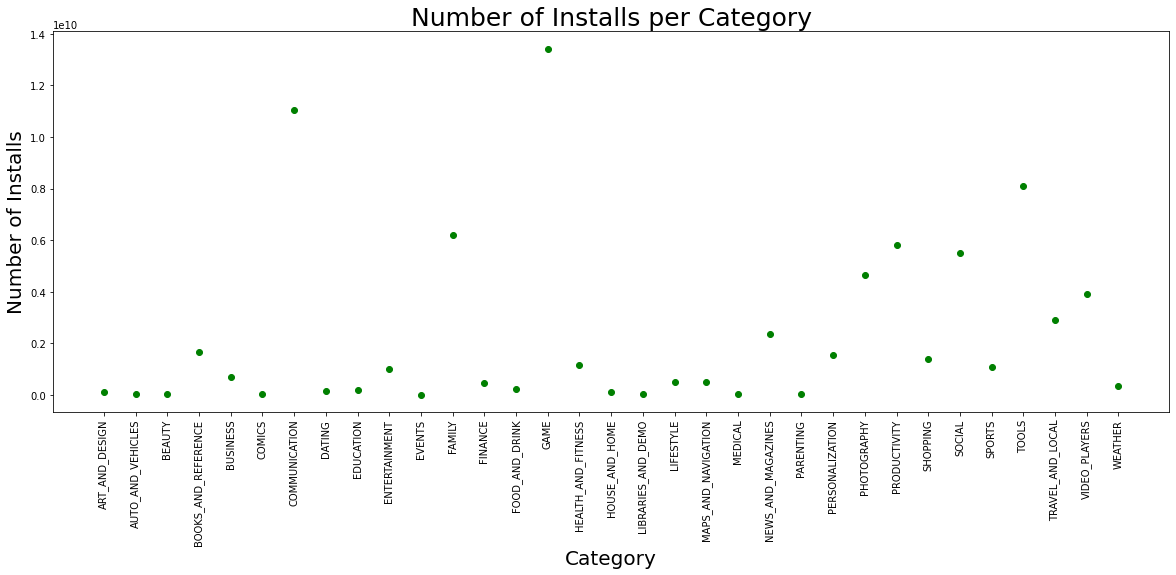

In [ ]:
# Number of installs type according to  each Category
plt.figure(figsize=(20,7))
plt.plot(d,'go')
plt.xticks(rotation=90)
plt.title('Number of Installs per Category',fontsize = 25)
plt.xlabel('Category',fontsize = 20)
plt.ylabel('Number of Installs',fontsize = 20)
plt.show()

# Most number of apps that are installed falls under category of Games followed by Communication and then Tools

# **Number of Apps present on Play store by Category**

In [ ]:
y = dfplay['Category'].value_counts()
x = dfplay['Category'].value_counts().index
xd = []
yd = []
for i in range(len(x)):
    xd.append(x[i])
    yd.append(y[i])

In [ ]:
pd.DataFrame(yd,xd)

,0
FAMILY,1873
GAME,947
TOOLS,829
BUSINESS,420
MEDICAL,395
PERSONALIZATION,376
PRODUCTIVITY,374
LIFESTYLE,369
FINANCE,345
SPORTS,325


Text(0.5, 1.0, 'Applications per Category')

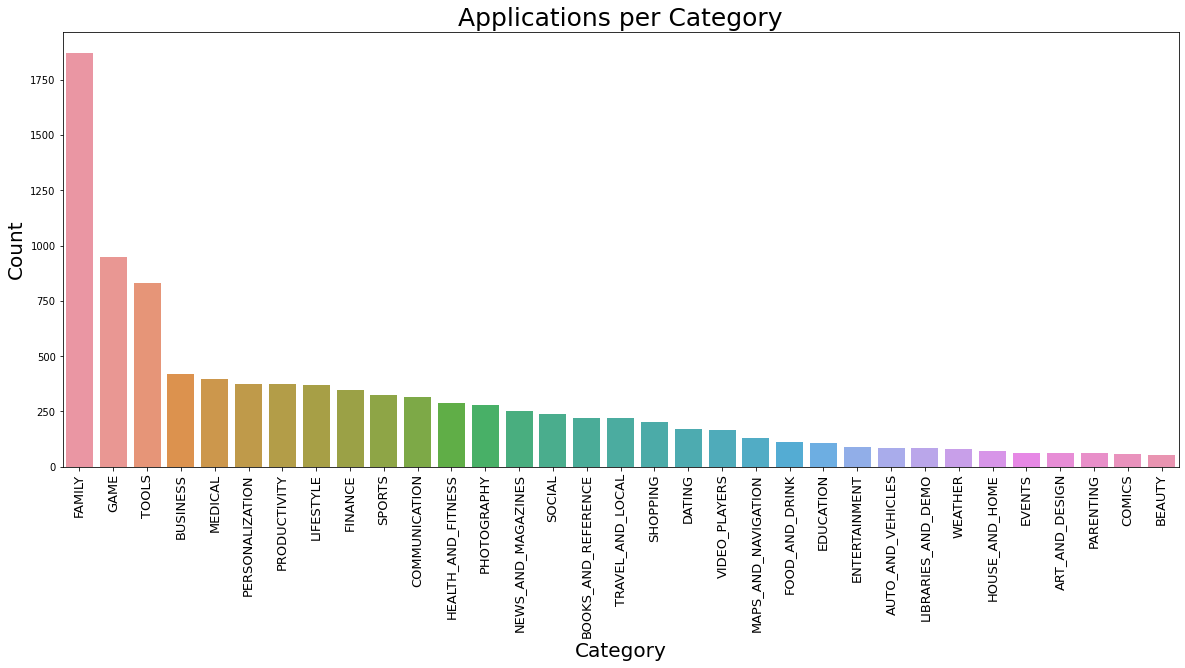

In [ ]:
plt.figure(figsize=(20,8))
plt.xticks(rotation=90, fontsize = 13)
plt.xlabel("Category",fontsize = 20)
plt.ylabel("Count",fontsize = 20)

graph = sns.barplot(x = xd, y = yd)
graph.set_title("Applications per Category", fontsize = 25)

#*From the above plot we can see that, maximum number of apps present on play store comes under Family category then with almost 50% decline in Games cateory and Tools Category.* 

# **Number of installed applications for each Category by type**





In [ ]:
cattype = dfplay.groupby(['Category','Type'])[['Installs']].sum().reset_index()
cattype['log_Installs'] = np.log10(cattype['Installs'])
cattype.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Category,Type,Installs,log_Installs
0,ART_AND_DESIGN,Free,113222100.0,8.053931
1,ART_AND_DESIGN,Paid,16000.0,4.204120
2,AUTO_AND_VEHICLES,Free,53080061.0,7.724931
3,AUTO_AND_VEHICLES,Paid,50150.0,4.700271
4,BEAUTY,Free,27197050.0,7.434522


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


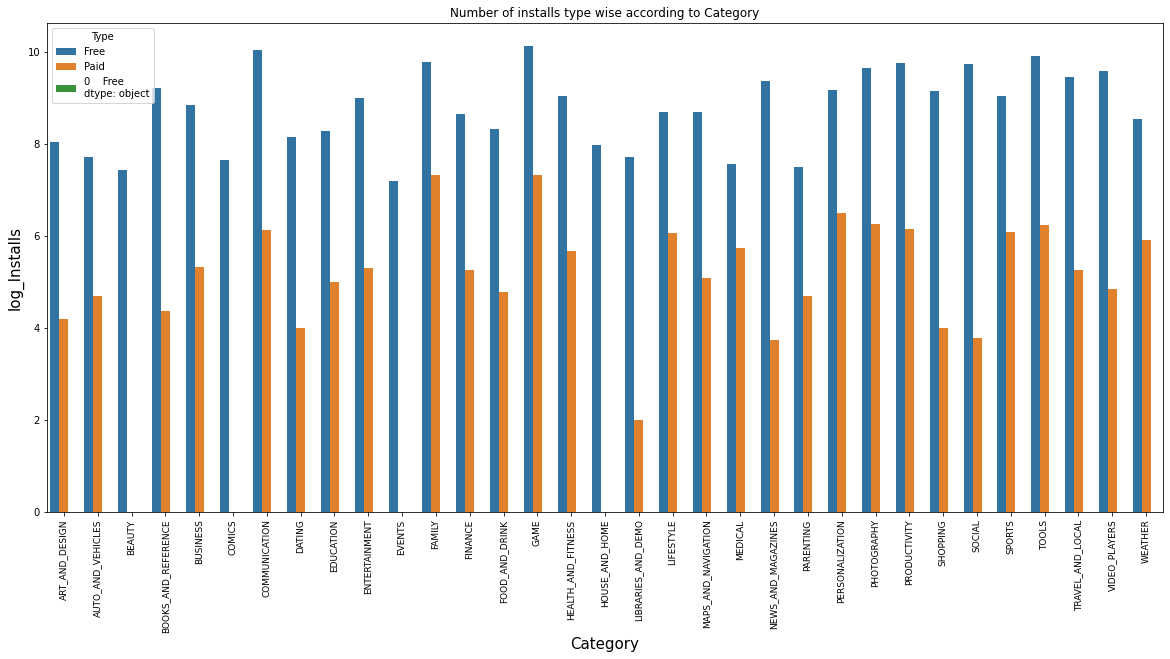

In [ ]:
plt.figure(figsize=(20,9))
plt.xticks(rotation=90,fontsize=9)
plt.xlabel("Category", fontsize=15)
plt.ylabel("Installs", fontsize=15)
plt.title("Number of installs type wise according to Category")
sns.barplot('Category', 'log_Installs', hue='Type', data=cattype);
plt.show()

## **Lets see the percent of Free to Paid Apps in Pie Chart**

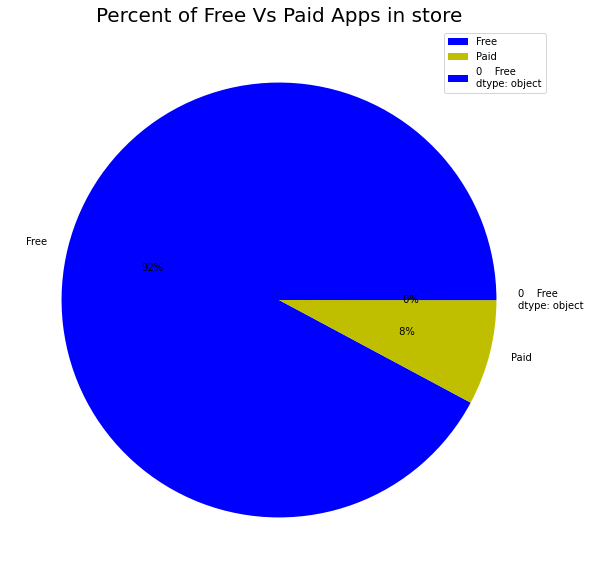

In [ ]:
# Total number of free and paid apps
plt.figure(figsize=(10,10))
labels =dfplay['Type'].value_counts().index
sizes = dfplay['Type'].value_counts(sort = True)
colors = ["blue","y"]
plt.pie(sizes,labels=labels, colors=colors,autopct='%2.0f%%')
plt.title('Percent of Free Vs Paid Apps in store',size = 20)
plt.legend()
plt.legend()

plt.show()



# **Number of free and paid apps**

In [ ]:
dfplay['Type'].value_counts()

Free                        8903
Paid                         755
0    Free\ndtype: object       1
Name: Type, dtype: int64

# **Total Number of Apps having 5 star Rating**

In [ ]:
temp = len(dfplay[dfplay['Rating']==5.0])
print('The total no. of App that have 5 star rating =',temp)

The total no. of App that have 5 star rating = 271


# **Apps with 5 Rating categorywise**




In [ ]:
five=dfplay[dfplay['Rating']==5]
five['Category'].value_counts()

FAMILY                 67
LIFESTYLE              29
MEDICAL                25
BUSINESS               18
TOOLS                  17
HEALTH_AND_FITNESS     12
GAME                   12
PERSONALIZATION        10
FINANCE                 8
PRODUCTIVITY            8
SOCIAL                  8
NEWS_AND_MAGAZINES      7
PHOTOGRAPHY             6
DATING                  6
BOOKS_AND_REFERENCE     6
SHOPPING                6
EVENTS                  6
COMMUNICATION           5
SPORTS                  4
TRAVEL_AND_LOCAL        3
FOOD_AND_DRINK          2
LIBRARIES_AND_DEMO      2
COMICS                  2
PARENTING               1
ART_AND_DESIGN          1
Name: Category, dtype: int64

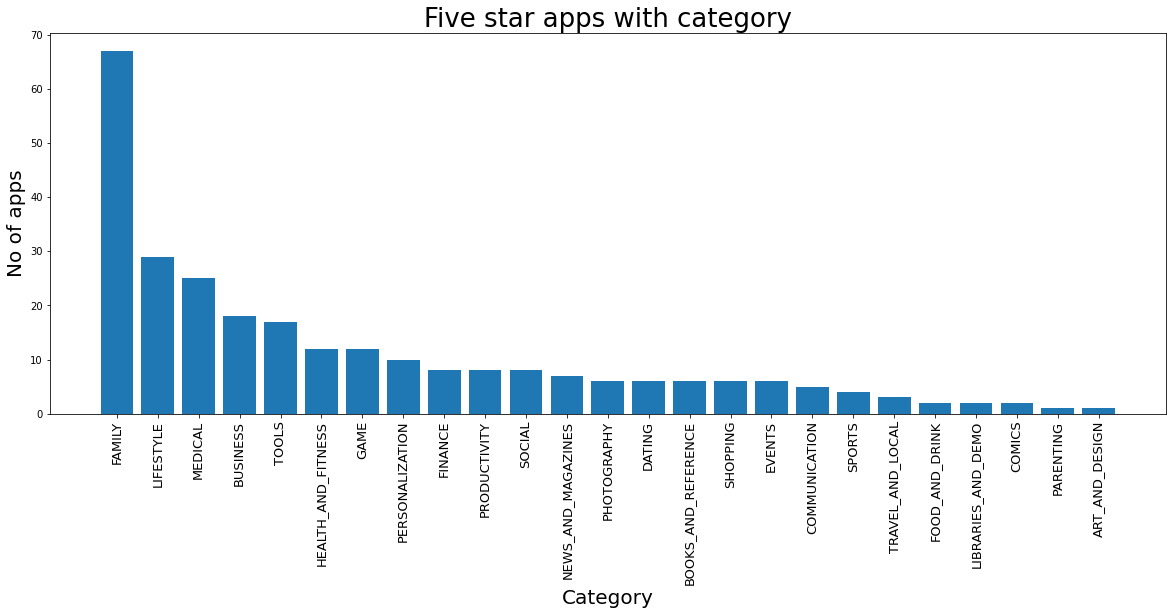

In [ ]:
plt.figure(figsize=(20,7))
# plt.plot(five['Category'].value_counts(),'go')
plt.bar(five['Category'].value_counts().index,five['Category'].value_counts())

plt.xticks(rotation=90, fontsize=13)
plt.title('Five star apps with category',fontsize = 26)
plt.xlabel('Category',fontsize = 20)
plt.ylabel('No of apps',fontsize = 20)
plt.show()

## As we can see, Family category has got the most 5 star rated apps, followedby lifestyle and then medical

# **Comparison between Free and Paid apps**

In [ ]:
# creating new data frame of only paid apps
Paid_Apps = dfplay[dfplay['Type'] == 'Paid']
# Paid_Apps.mean(skipna = True)
Paid_Apps.sum(skipna=True)

App               10 WPM Amateur ham radio CW Morse code trainer...
Category          COMMUNICATIONBOOKS_AND_REFERENCEBOOKS_AND_REFE...
Rating                                                       3223.8
Reviews                                                   6595973.0
Size                                                        13017.4
Installs                                                 57363881.0
Type              PaidPaidPaidPaidPaidPaidPaidPaidPaidPaidPaidPa...
Price                                                      10611.14
Content Rating    EveryoneEveryoneEveryoneEveryoneEveryoneEveryo...
Genres            CommunicationBooks & ReferenceBooks & Referenc...
Last Updated      May 12, 2018August 30, 2013May 27, 2016March 5...
Current Ver       2.1.41.31.221.0.91.0.53.0.41.32.0.32.0.21.22.1...
Android Ver       2.1 and up2.1 and up2.2 and up1.6 and up4.0.3 ...
Size in MBs                                                     0.0
dtype: object

In [ ]:
# creating new data frame of only free apps
Free_Apps = dfplay[dfplay['Type'] == 'Free']
# Free_Apps.mean(skipna = True)
Free_Apps.sum(skipna= True)

App               "i DT" Fútbol. Todos Somos Técnicos.+Download ...
Category          SPORTSSOCIALCOMICSTOOLSCOMMUNICATIONNEWS_AND_M...
Rating                                                      37268.2
Reviews                                                2087014255.0
Size                                                    158948.1795
Installs                                              75216062646.0
Type              FreeFreeFreeFreeFreeFreeFreeFreeFreeFreeFreeFr...
Price                                                           0.0
Content Rating    EveryoneEveryoneMature 17+EveryoneMature 17+Ev...
Genres            SportsSocialComicsToolsCommunicationNews & Mag...
Last Updated      October 7, 2017August 2, 2018July 13, 2018Sept...
Current Ver       0.225.035.0.121.1.064.2.41.01.13.01.91.22.2.21...
Android Ver       4.1 and up4.1 and up5.0 and up1.5 and up4.1 an...
Size in MBs                                                     0.0
dtype: object

### As we can see, Average rating for paid apps is higher than the free apps.
### In case of size, average size of free apps is sligtly higher than that of paid apps

## **Highest revenue generating app**


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


Text(0.5, 1.0, 'Top Revenue Generating Apps')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128142 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128142 missing from current font.
  font.set_text(s, 0, flags=flags)


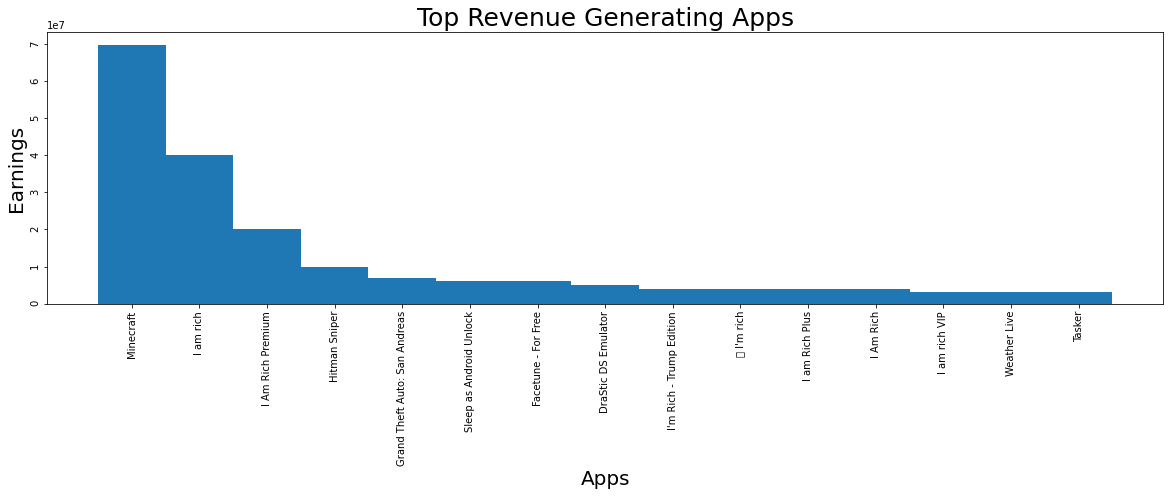

In [ ]:


earning_df = Paid_Apps[['App', 'Installs', 'Price']]

earning_df['Earnings'] = earning_df['Installs'] * earning_df['Price']

# sorting above data by earnings
earning_df_sorted_by_Earnings = earning_df.sort_values(by='Earnings', ascending=False).head(15)

# plotting the graph
plt.figure(figsize=(20,5))
plt.bar(earning_df_sorted_by_Earnings['App'], earning_df_sorted_by_Earnings['Earnings'], width=1, label=earning_df_sorted_by_Earnings['Earnings'])
plt.xlabel("Apps", fontsize=20)
plt.ylabel("Earnings", fontsize=20)
plt.tick_params(rotation=90)
plt.title("Top Revenue Generating Apps",fontsize=25)



##As we can see from the bar plot, minecraft has made the most revenue out of all the paid apps on playstore.

#<B>The App with highest price

In [ ]:
temp= dfplay[dfplay.Price==dfplay['Price'].max()].iloc[0]
print("The App that has the highest price is:", temp["App"],'with price',temp['Price'])

The App that has the highest price is: I'm Rich - Trump Edition with price 400.0


# **Top 10 most expensive apps are**

In [ ]:
dfplay.sort_values(by=['Price','Rating'],ascending=False).head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275.0,7.3,10000.0,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5362,I Am Rich Pro,FAMILY,4.4,201.0,2.7,5000.0,Paid,399.99,Everyone,Entertainment,"May 30, 2017",1.54,1.6 and up
5369,I am Rich,FINANCE,4.3,180.0,3.8,5000.0,Paid,399.99,Everyone,Finance,"March 22, 2018",1.0,4.2 and up
9934,I'm Rich/Eu sou Rico/أنا غني/我很有錢,LIFESTYLE,4.3,0.0,40.0,0.0,Paid,399.99,Everyone,Lifestyle,"December 1, 2017",MONEY,4.1 and up
4197,most expensive app (H),FAMILY,4.3,6.0,1.5,100.0,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
5356,I Am Rich Premium,FINANCE,4.1,1867.0,4.7,50000.0,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5364,I am rich (Most expensive app),FINANCE,4.1,129.0,2.7,1000.0,Paid,399.99,Teen,Finance,"December 6, 2017",2,4.0.3 and up
5373,I AM RICH PRO PLUS,FINANCE,4.0,36.0,41.0,1000.0,Paid,399.99,Everyone,Finance,"June 25, 2018",1.0.2,4.1 and up
5354,I am Rich Plus,FAMILY,4.0,856.0,8.7,10000.0,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
5358,I am Rich!,FINANCE,3.8,93.0,22.0,1000.0,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up


# **Top 10 highest rated apps are**

In [ ]:
dfplay.sort_values(by=['Rating','Reviews'],ascending=False).head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10357,Ríos de Fe,LIFESTYLE,5.0,141.0,15.0,1000.0,Free,0.0,Everyone,Lifestyle,"March 24, 2018",1.8,4.1 and up
10301,"FD Calculator (EMI, SIP, RD & Loan Eligilibility)",FINANCE,5.0,104.0,2.3,1000.0,Free,0.0,Everyone,Finance,"August 7, 2018",2.1.0,4.1 and up
8058,Oración CX,LIFESTYLE,5.0,103.0,3.8,5000.0,Free,0.0,Everyone,Lifestyle,"September 12, 2017",5.1.10,4.1 and up
6823,Barisal University App-BU Face,FAMILY,5.0,100.0,10.0,1000.0,Free,0.0,Everyone,Education,"May 6, 2018",3.1.1,4.0.3 and up
9496,Master E.K,FAMILY,5.0,90.0,NaN,1000.0,Free,0.0,Everyone,Education,"August 11, 2017",1.5.0,4.4 and up
7506,CL REPL,TOOLS,5.0,47.0,17.0,1000.0,Free,0.0,Everyone,Tools,"April 10, 2018",1.0.19,4.1 and up
5230,AJ Cam,PHOTOGRAPHY,5.0,44.0,2.8,100.0,Free,0.0,Everyone,Photography,"January 23, 2018",1.0,4.1 and up
5196,AI Today : Artificial Intelligence News & AI 101,NEWS_AND_MAGAZINES,5.0,43.0,2.3,100.0,Free,0.0,Everyone,News & Magazines,"June 22, 2018",1.0,4.4 and up
7842,CS & IT Interview Questions,FAMILY,5.0,43.0,3.3,1000.0,Free,0.0,Everyone,Education,"March 27, 2018",1.1,4.2 and up
9517,Ek Vote,PRODUCTIVITY,5.0,43.0,6.2,500.0,Free,0.0,Everyone,Productivity,"November 7, 2017",1.1,4.0.3 and up



# **Distribution of App Size**


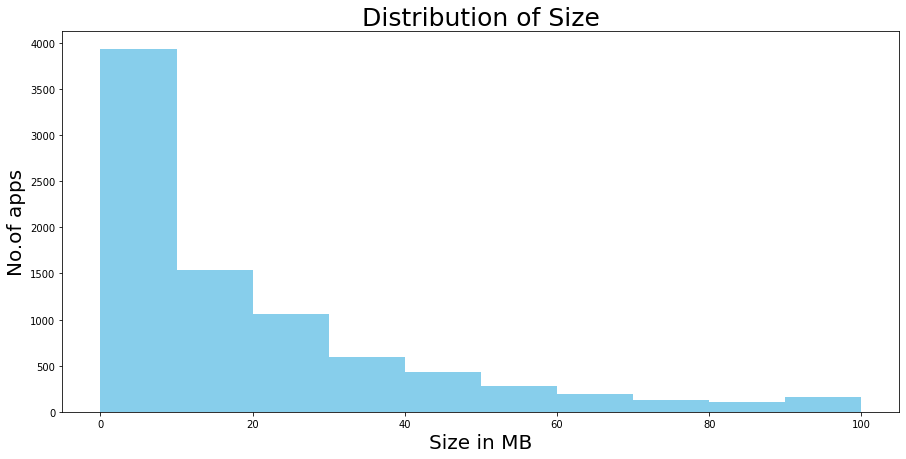

In [ ]:
# to remove null values from size column
dfplay.loc[dfplay['Size'].isnull(),'Size in MBs']=0
plt.figure(figsize=(15,7))
plt.xlabel("Size in MB",fontsize=20)
plt.ylabel("No.of apps", fontsize=20)
plt.title("Distribution of Size",fontsize=25)
plt.hist(dfplay['Size'],color='skyblue')
plt.show()

### *It can be seen from the distribution size plot that maximum applications' size is between 0–10 MB.*

# **Apps classified by different age group**

Text(0.5, 0, 'Content Rating')

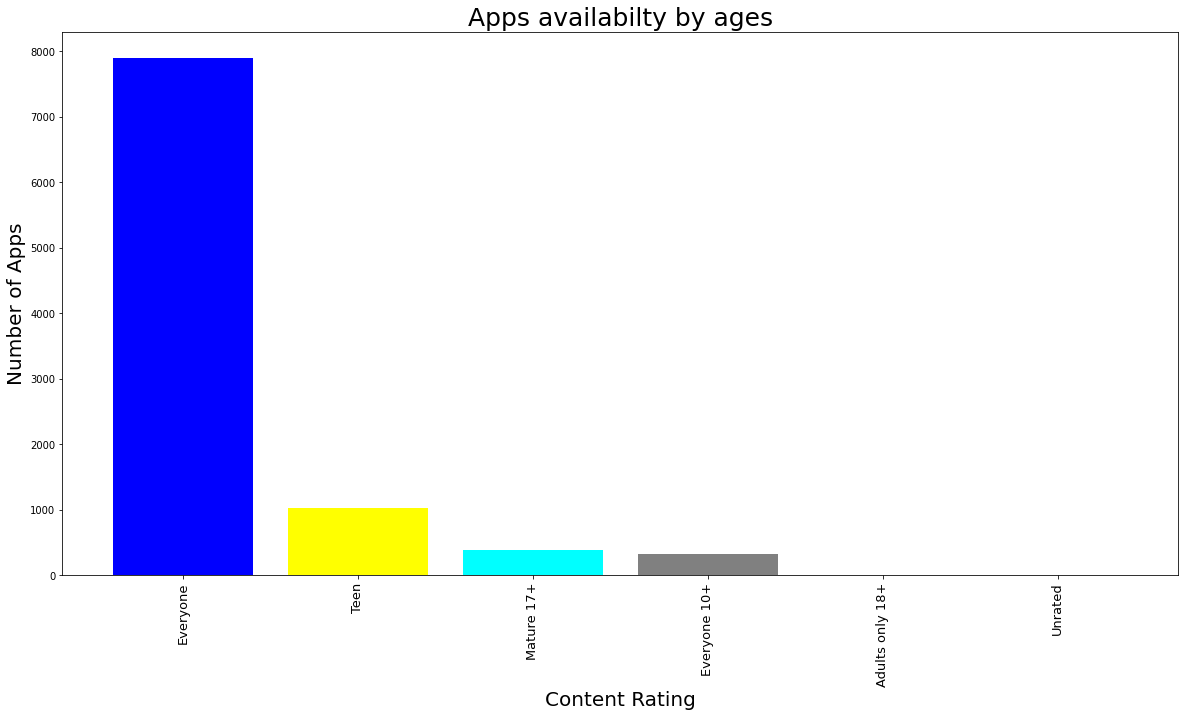

In [ ]:
# Defining x and y axis of the graph
x2 = dfplay['Content Rating'].value_counts().index
y2 = dfplay['Content Rating'].value_counts()

x2l = []
y2l = []
for i in range(len(x2)):
    x2l.append(x2[i])
    y2l.append(y2[i])
    
# plotting the graph

plt.figure(figsize=(20,10))
plt.bar(x2l,y2l,color=['blue','yellow','cyan','grey','skyblue','green'])
plt.title('Apps availabilty by ages',size = 25)
plt.xticks(rotation=90, fontsize=13)
plt.ylabel('Number of Apps', fontsize=20)
plt.xlabel('Content Rating', fontsize=20)

##Most apps are available for everyone followed by apps for teens

## **Lets Analyze user reviews file**

Lets merge both files on column app

In [ ]:
mergeddf = dfplay.merge(dfuser, on="App")
mergeddf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61556 entries, 0 to 61555
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     61556 non-null  object 
 1   Category                61556 non-null  object 
 2   Rating                  61556 non-null  float64
 3   Reviews                 61556 non-null  float64
 4   Size                    41110 non-null  float64
 5   Installs                61556 non-null  float64
 6   Type                    61556 non-null  object 
 7   Price                   61556 non-null  float64
 8   Content Rating          61556 non-null  object 
 9   Genres                  61556 non-null  object 
 10  Last Updated            61556 non-null  object 
 11  Current Ver             61556 non-null  object 
 12  Android Ver             61556 non-null  object 
 13  Size in MBs             20446 non-null  float64
 14  Translated_Review       35929 non-null

In [ ]:
mergeddf.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size in MBs,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490.0,3.8,500000.0,Free,0.0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up,NaN,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490.0,3.8,500000.0,Free,0.0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up,NaN,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490.0,3.8,500000.0,Free,0.0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up,NaN,NaN,NaN,NaN,NaN
3,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490.0,3.8,500000.0,Free,0.0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up,NaN,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490.0,3.8,500000.0,Free,0.0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up,NaN,Best idea us,Positive,1.00,0.300000


---
###A Pie Chart Representing Review Sentiments in Percentage
---

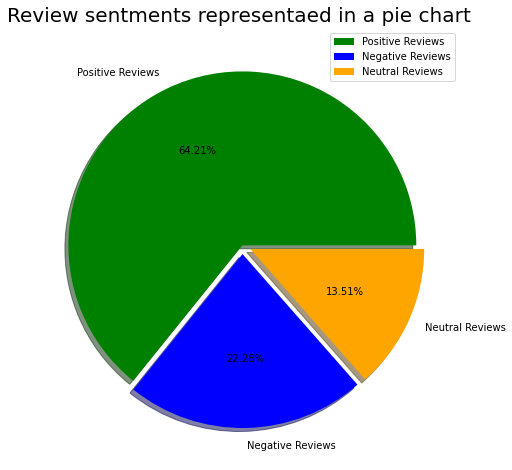

In [ ]:
no = list(mergeddf['Sentiment'].value_counts())
labels = 'Positive Reviews', 'Negative Reviews','Neutral Reviews'
# matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['figure.figsize'] = (8, 8)
plt.pie(no, labels=labels, explode=[0, 0.05, 0.05], shadow=True, autopct="%.2f%%", colors = ['green','blue','orange'])
plt.title('Review sentments representaed in a pie chart ', fontsize=20)
plt.legend()
plt.show()

*As seen from the pie chart, positive reviews are 64.08*%,

negative reviews are 22.85% 

and neutral reviews are 13.06%

Majority of users are satisfied with the apps 

In [ ]:
cattypese = mergeddf.groupby(['Category','Sentiment'])[['Installs']].sum().reset_index()
cattypese.head()

,Category,Sentiment,Installs
0,ART_AND_DESIGN,Negative,61300000.0
1,ART_AND_DESIGN,Neutral,109300000.0
2,ART_AND_DESIGN,Positive,536500000.0
3,AUTO_AND_VEHICLES,Negative,17000000.0
4,AUTO_AND_VEHICLES,Neutral,18000000.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


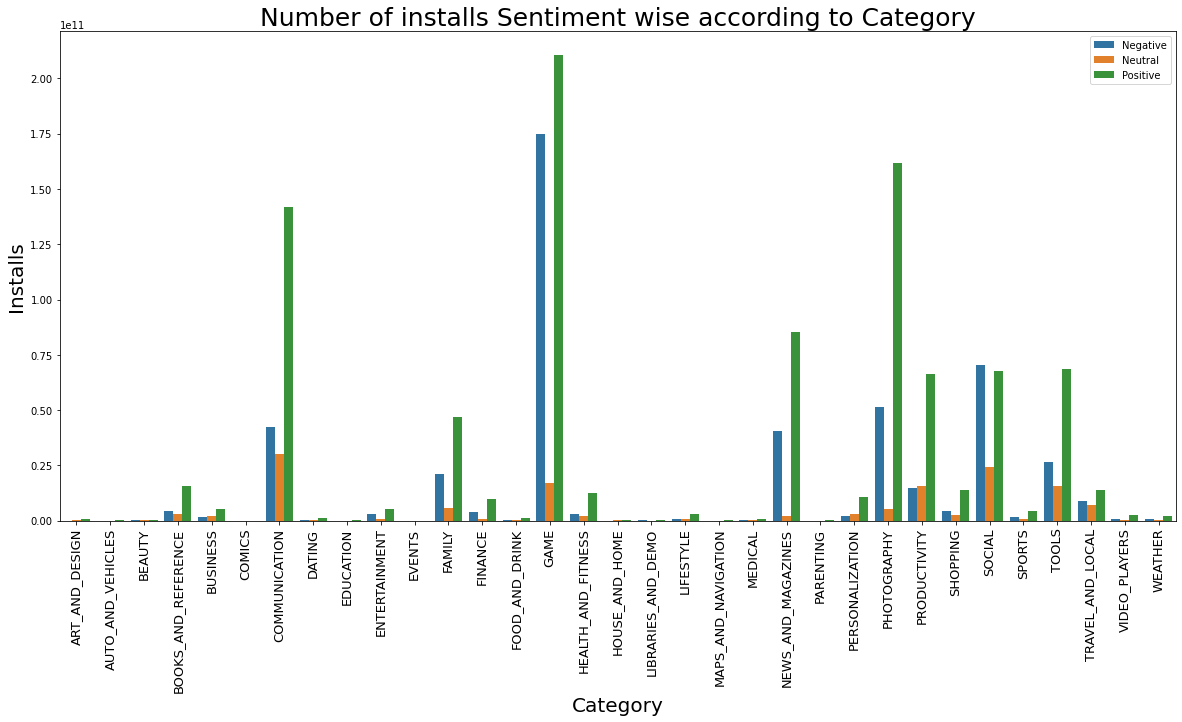

In [ ]:
plt.figure(figsize=(20,9))
plt.xticks(rotation=90,fontsize=13)
plt.xlabel("Category", fontsize=20)
plt.ylabel("Installs", fontsize=20)
plt.title("Number of installs Sentiment wise according to Category", fontsize=25)
sns.barplot('Category', 'Installs', hue='Sentiment', data=cattypere)
plt.legend()
plt.show()

### Since the graph looks skewed, because of high number of installs for certain category and very low number of Installs for certain category, we will plot by converting Installs values to logarithmic scale

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


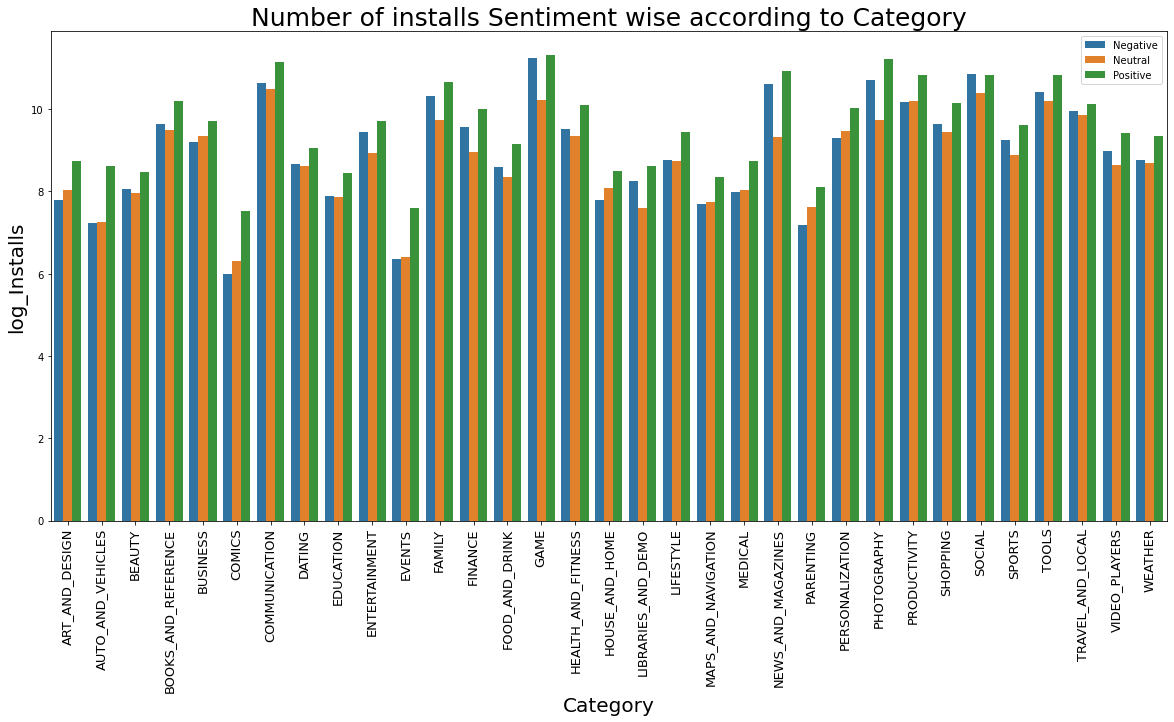

In [ ]:
cattypese['log_Installs'] = np.log10(cattypese['Installs'])
plt.figure(figsize=(20,9))
plt.xticks(rotation=90,fontsize=13)
plt.xlabel("Category", fontsize=20)
plt.ylabel("Installs", fontsize=20)
plt.title("Number of installs Sentiment wise according to Category", fontsize=25)
sns.barplot('Category', 'log_Installs', hue='Sentiment', data=cattypese)
plt.legend()
plt.show()

---
#Analysis Conclusion :
---




* It has been observed that Users prefer to install free apps over paid apps. This observation is verified accross all categories
* Paid Apps have average rating of 4.26 whereas Free Apps have average Rating of 4.18
* Family category has highest number of Apps among any category
* There are total 271 Apps with 5 star Rating, out of which Family category has Maximum 5 star rated Apps which are 67.
* Most expensive App is I'm rich - Trump Edition
* Highest rated app with highest number of Reviews is Rios de Fe
* Strangely enough, Highest Revenue making app is Minecraft, which is neither in Top 10 of Highest Rated Apps or Top 10 Most expensive Apps. This means it is not necessary for an App to make high revenue.
* 64.21% reviews signal that users are happy about the app
  
  13.06% reviews signal that users are satisfied with the app, but those could be improved
  
  22.08% reviews has shown that users are unsatisfied with the Apps and there is large mismatch between expectation of users and App delivered by developers
